# WFC Stock Market Impact Analysis

## Objective  
Analyze how the fake accounts scandal affected Wells Fargo's stock price and market position.

## Methods  
 
- **Comparative Analysis**: Compare WFC’s stock performance to competitors like JPMorgan Chase and Bank of America.  
- **Time Series Analysis**: Analyze Wells Fargo's (WFC) stock price before, during, and after the scandal using Prophet.

## Data  
Stock data from 

[Kaggle: WELLS FARGO Stock Data](https://www.kaggle.com/datasets/varpit94/wells-fargo-stock-data-updated-till-30jun-2021)  

[BAC.com: BAC Stock Data](https://investor.bankofamerica.com/shareholder-information/historical-data)

[Investing.com: JPM Stock Data](https://www.investing.com/equities/jp-morgan-chase-historical-data)


### Data Fields:  
- **Date**: Date of the transaction  
- **Open**: Price from the first transaction of a trading day  
- **High**: Maximum price in a trading day  
- **Low**: Minimum price in a trading day  
- **Close**: Price from the last transaction of a trading day  
- **Adj Close**: Closing price adjusted to reflect the value after accounting for corporate actions  
- **Volume**: Number of units traded in a day.


## Wells Fargo Stock Data EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load Wells Fargo dataset
WFC_df = pd.read_csv("WFC.csv")  

WFC_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,0.882813,0.880208,0.880208,0.152143,249600
1,1972-06-02,0.882813,0.890625,0.882813,0.882813,0.152593,172800
2,1972-06-05,0.882813,0.895833,0.880208,0.895833,0.154844,302400
3,1972-06-06,0.895833,0.911458,0.893229,0.895833,0.154844,196800
4,1972-06-07,0.895833,0.895833,0.888021,0.888021,0.153493,48000
...,...,...,...,...,...,...,...
12558,2022-03-18,50.849998,51.540001,50.040001,51.419998,51.419998,60949500
12559,2022-03-21,51.660000,51.799999,50.610001,51.139999,51.139999,23411500
12560,2022-03-22,52.410000,54.200001,52.299999,53.389999,53.389999,28625600
12561,2022-03-23,52.759998,53.049999,51.099998,51.119999,51.119999,27988700


In [5]:
# Convert Date column to datetime format
WFC_df["Date"] = pd.to_datetime(WFC_df["Date"], errors='coerce')

# Check for missing values
print("\nMissing Values:\n", WFC_df.isnull().sum())


Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Display basic statistics
print("\nDataset Info:\n", WFC_df.info())

print("\nSummary Statistics:\n", WFC_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12563 non-null  datetime64[ns]
 1   Open       12563 non-null  float64       
 2   High       12563 non-null  float64       
 3   Low        12563 non-null  float64       
 4   Close      12563 non-null  float64       
 5   Adj Close  12563 non-null  float64       
 6   Volume     12563 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 687.2 KB

Dataset Info:
 None

Summary Statistics:
                                 Date          Open          High   
count                          12563  12563.000000  12563.000000  \
mean   1997-04-20 05:10:23.831887360     18.421082     18.621216   
min              1972-06-01 00:00:00      0.000000      0.510417   
25%              1984-11-05 12:00:00      1.309896      1.317708   
50%            

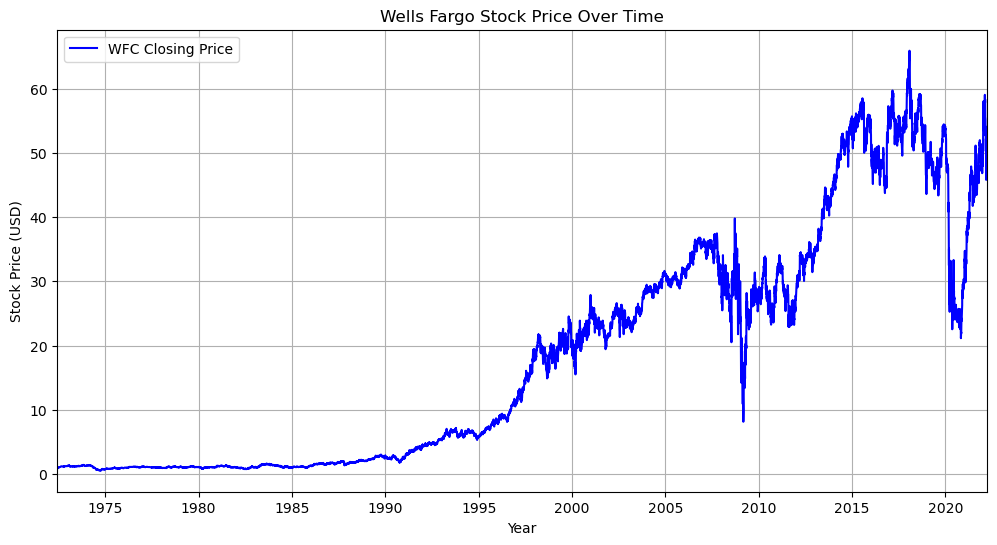

In [7]:
# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(WFC_df["Date"], WFC_df["Close"], label="WFC Closing Price", color="blue")

# Set x-axis ticks every 5 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ensure full date range is used
plt.xlim(WFC_df["Date"].min(), WFC_df["Date"].max())

plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Wells Fargo Stock Price Over Time")
plt.legend()
plt.grid()

plt.show()

I will be using the **Adj Close** variable for this analysis since this variable is:

- Adjusted for dividends, stock splits, and other corporate actions that affect stock value.
- More accurate for long-term trends and investment performance comparisons.
- Best for time series forecasting (ARIMA, LSTMs, Prophet) since it represents a stock’s real worth over time. 


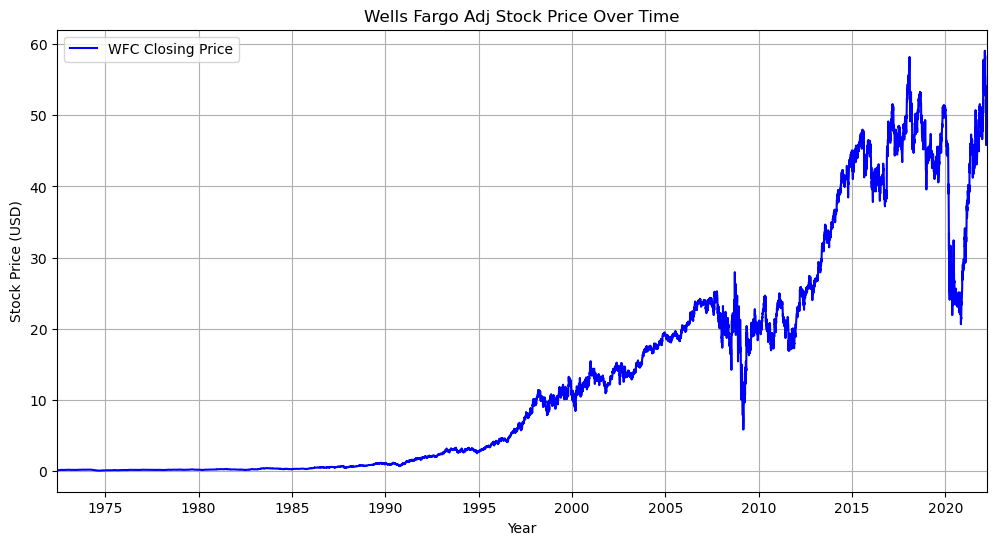

In [9]:
# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(WFC_df["Date"], WFC_df["Adj Close"], label="WFC Closing Price", color="blue")

# Set x-axis ticks every 5 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ensure full date range is used
plt.xlim(WFC_df["Date"].min(), WFC_df["Date"].max())

plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Wells Fargo Adj Stock Price Over Time")
plt.legend()
plt.grid()

plt.show()

From the graph, we can observe a significant drop in Wells Fargo’s stock price in 2016, coinciding with the fake accounts scandal. This aligns with historical reports indicating that fraudulent activities began as early as 2002 but escalated in the early 2010s due to aggressive sales goals and pressure from upper management [Investopidia](https://www.investopedia.com/wells-fargo-timeline-7498799?utm). 

Before the scandal, Wells Fargo’s stock showed steady growth. The graph indicates:

- **Pre-2007:** A general upward trend with periodic fluctuations.
- **2007-2012:** A more linear movement, where the stock price remained relatively stable with some volatility, likely influenced by the 2008 financial crisis.
- **2012-2016:** A sharp increase, suggesting strong investor confidence before the scandal became public.
- **2016 Drop:** A notable decline in stock value, reflecting the market’s reaction to the scandal.
- **Post-2016 Recovery:** Despite the scandal, the stock price rebounded, indicating Wells Fargo’s ability to regain investor trust over time.

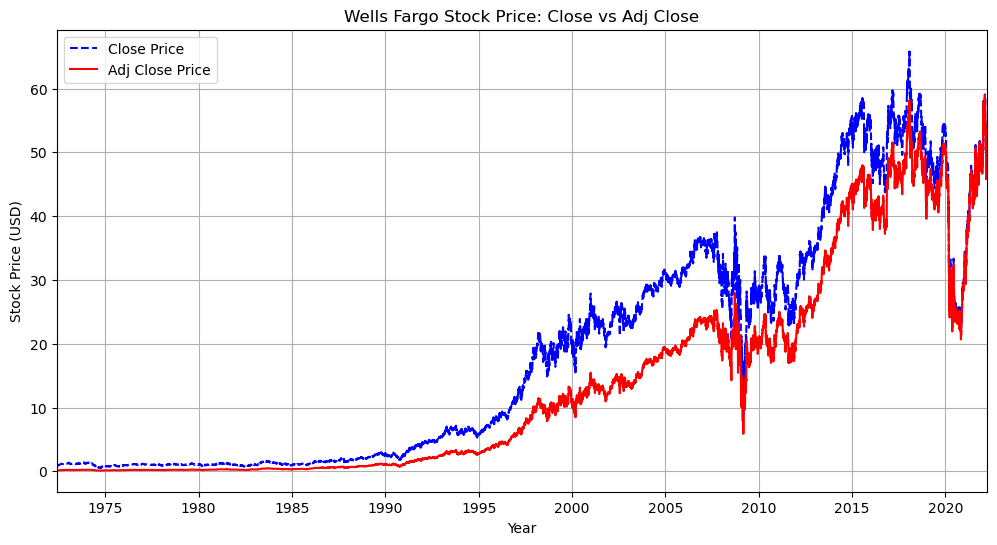

In [11]:
# Plot Closing and Adjusted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(WFC_df["Date"], WFC_df["Close"], label="Close Price", color="blue", linestyle="dashed")
plt.plot(WFC_df["Date"], WFC_df["Adj Close"], label="Adj Close Price", color="red")

# Set x-axis ticks every 5 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ensure full date range is used
plt.xlim(WFC_df["Date"].min(), WFC_df["Date"].max())

plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Wells Fargo Stock Price: Close vs Adj Close")
plt.legend()
plt.grid()

plt.show()

## Comparison of WFC Stock Price Trends Against JPMorgan Chase & Bank of America

In [13]:
#Load datasets

JPM_df = pd.read_csv("JPMorgan_Stock_Price_History.csv", parse_dates=["Date"])
BAC_df = pd.read_excel("BAC.xlsx", parse_dates=["Date"])

In [14]:
JPM_df

,Date,Price,Open,High,Low,Vol.,Change %
0,2015-12-18,64.40,65.97,65.97,64.40,23.82M,-2.84%
1,2015-12-17,66.28,67.90,68.00,66.08,18.12M,-1.85%
2,2015-12-16,67.53,66.91,67.74,65.91,21.72M,2.16%
3,2015-12-15,66.10,65.07,66.65,65.07,18.13M,2.85%
4,2015-12-14,64.27,64.23,64.75,63.60,17.64M,0.31%
...,...,...,...,...,...,...,...
4995,1996-02-15,22.58,22.42,22.71,22.42,4.13M,0.00%
4996,1996-02-14,22.58,22.54,22.75,22.38,3.07M,0.18%
4997,1996-02-13,22.54,22.33,22.67,22.33,4.31M,0.00%
4998,1996-02-12,22.54,22.25,22.63,22.17,3.80M,1.12%


In [15]:
BAC_df

,Date,Open,High,Low,Close,VWAP,Volume,% Chg,$ Chg,Trade Val,# Trades
0,1996-02-09,11.722,11.902,11.682,11.743,--,4.09m,0.0000,--,--,--
1,1996-02-12,11.783,11.842,11.703,11.762,--,2.72m,0.0016,0.01917,--,--
2,1996-02-13,11.722,11.882,11.722,11.802,--,3.00m,0.0034,0.03994,--,--
3,1996-02-14,11.802,11.902,11.663,11.682,--,3.09m,-0.0102,-0.1198,--,--
4,1996-02-15,11.722,11.882,11.682,11.823,--,2.26m,0.0120,0.1406,--,--
...,...,...,...,...,...,...,...,...,...,...,...
7474,2025-02-03,45.42,46.48,45.11,46.210,45.953,36.50m,-0.0019,-0.09,1678107652.77,179501
7475,2025-02-04,46.35,47.13,46.27,46.710,46.775,32.89m,0.0108,0.5,1538545451.77,139393
7476,2025-02-05,46.98,47.13,46.645,47.110,46.942,27.70m,0.0086,0.4,1300100585.27,112442
7477,2025-02-06,47.44,47.98,47.17,47.740,47.697,39.79m,0.0134,0.63,1898118618.53,137229


In [16]:
# Display basic statistics
JPM_df.info()

JPM_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      5000 non-null   object        
 6   Change %  5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.6+ KB


,Date,Price,Open,High,Low
count,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2006-01-13 21:53:51.359999872,42.138696,42.138248,42.693004,41.570500
min,1996-02-09 00:00:00,15.450000,15.370000,16.350000,14.960000
25%,2001-01-23 18:00:00,35.437500,35.477500,35.857500,34.987500
50%,2006-01-15 00:00:00,41.080000,41.105000,41.615000,40.575000
75%,2010-12-31 18:00:00,48.670000,48.675000,49.290000,48.040000
max,2015-12-18 00:00:00,70.080000,70.190000,70.610000,69.460000
std,NaN,10.337789,10.341690,10.366438,10.312303


I just noticed that the JPM dataset is incomplete. I couldn’t download all the data from 1996 to the present in one go, so I had to download it in separate parts. Now, I need to merge all the documents.

In [18]:
import pandas as pd
import glob

# Path where the files are located (modify if needed)
file_path = "/Users/liz/Documents/Master Data Science/Practicum I/"

# Get a list of all relevant files (assuming CSV format)
file_list = sorted(glob.glob(file_path + "Download Data - STOCK_US_XNYS_JPM (*).csv"))

# Include the main file at the beginning
file_list.insert(0, file_path + "JPMorgan_Stock_Price_History.csv")

# Load and concatenate all files
df_list = [pd.read_csv(file) for file in file_list]
merged_df = pd.concat(df_list, ignore_index=True)

# Save the merged file
merged_df.to_csv(file_path + "JPMorgan_Stock_Merged.csv", index=False)

print("Merge completed. Saved as JPMorgan_Stock_Merged.csv")

Merge completed. Saved as JPMorgan_Stock_Merged.csv


In [19]:
JPM_df = pd.read_csv("JPMorgan_Stock_Merged.csv", parse_dates=["Date"])

In [20]:
# Display basic statistics
JPM_df.info()

JPM_df.describe()

JPM_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7306 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      7306 non-null   float64       
 3   High      7306 non-null   float64       
 4   Low       7306 non-null   float64       
 5   Vol.      5000 non-null   object        
 6   Change %  5000 non-null   object        
 7   Close     2306 non-null   float64       
 8   Volume    2306 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 513.8+ KB


,Date,Price,Open,High,Low,Vol.,Change %,Close,Volume
0,2015-12-18,64.40,65.97,65.97,64.40,23.82M,-2.84%,NaN,NaN
1,2015-12-17,66.28,67.90,68.00,66.08,18.12M,-1.85%,NaN,NaN
2,2015-12-16,67.53,66.91,67.74,65.91,21.72M,2.16%,NaN,NaN
3,2015-12-15,66.10,65.07,66.65,65.07,18.13M,2.85%,NaN,NaN
4,2015-12-14,64.27,64.23,64.75,63.60,17.64M,0.31%,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7301,2016-02-12,NaN,55.65,57.57,55.17,NaN,NaN,57.49,"37,011,352"
7302,2016-02-11,NaN,53.90,53.91,52.50,NaN,NaN,53.07,"44,334,660"
7303,2016-02-10,NaN,56.57,57.41,55.47,NaN,NaN,55.52,"22,389,590"
7304,2016-02-09,NaN,55.29,56.69,55.13,NaN,NaN,56.20,"26,300,051"


I noticed that my dataset has two columns, Price and Close, which seem to represent the same thing but at different time periods. The Price column has values for the earlier years, while the Close column has values for the later years, with missing values where the other is present.

To create a single, continuous Close column that covers the entire dataset, I’m merging these two by filling in the missing values in Close with the corresponding values from Price. This way, I ensure that my closing price data is complete without losing any information.

In [22]:
JPM_df["Close"] = JPM_df["Close"].fillna(JPM_df["Price"])
JPM_df.info()

# Save the updated JPM_df
JPM_df.to_csv(file_path + "JPMorgan_Stock_Merged.csv", index=False)

print("Merge completed. Saved as JPMorgan_Stock_Merged.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7306 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      7306 non-null   float64       
 3   High      7306 non-null   float64       
 4   Low       7306 non-null   float64       
 5   Vol.      5000 non-null   object        
 6   Change %  5000 non-null   object        
 7   Close     7306 non-null   float64       
 8   Volume    2306 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 513.8+ KB
Merge completed. Saved as JPMorgan_Stock_Merged.csv


In [23]:
# Display basic statistics
BAC_df.info()

BAC_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7479 non-null   datetime64[ns]
 1   Open       7479 non-null   object        
 2   High       7479 non-null   object        
 3   Low        7479 non-null   object        
 4   Close      7479 non-null   float64       
 5   VWAP       7479 non-null   object        
 6   Volume     7479 non-null   object        
 7   % Chg      7479 non-null   float64       
 8   $ Chg      7479 non-null   object        
 9   Trade Val  7479 non-null   object        
 10  # Trades   7479 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 642.9+ KB


,Date,Close,% Chg
count,7479,7479.000000,7479.000000
mean,2010-06-28 13:53:18.555956736,21.579609,0.000537
min,1996-02-09 00:00:00,2.486500,-0.289700
25%,2003-04-10 12:00:00,13.429500,-0.009600
50%,2010-06-10 00:00:00,21.127000,0.000000
75%,2017-08-30 12:00:00,28.064500,0.010250
max,2025-02-07 00:00:00,47.740000,0.352700
std,NaN,9.381029,0.026518


In [24]:
WFC_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,12563,12563.000000,12563.000000,12563.000000,12563.000000,12563.000000,1.256300e+04
mean,1997-04-20 05:10:23.831887360,18.421082,18.621216,18.215295,18.421906,13.583034,1.178222e+07
min,1972-06-01 00:00:00,0.000000,0.510417,0.479167,0.489583,0.090235,0.000000e+00
25%,1984-11-05 12:00:00,1.309896,1.317708,1.299479,1.309896,0.379886,8.516000e+05
50%,1997-04-10 00:00:00,12.406250,12.625000,12.062500,12.406250,6.501441,3.777600e+06
75%,2009-10-01 12:00:00,30.595000,30.915001,30.250000,30.617500,21.678468,1.527255e+07
max,2022-03-24 00:00:00,65.889999,66.309998,65.660004,65.930000,59.060001,4.787366e+08
std,NaN,18.191102,18.356880,18.026279,18.190226,15.776920,2.135754e+07


In [25]:
# Ensure date format is consistent and sort values
for df in [WFC_df, JPM_df, BAC_df]:
    df.sort_values("Date", inplace=True)

In [26]:
# Align timeframes to match the available data
start_date = max(WFC_df["Date"].min(), JPM_df["Date"].min(), BAC_df["Date"].min())
end_date = min(WFC_df["Date"].max(), JPM_df["Date"].max(), BAC_df["Date"].max())

# Filter data for the common date range
WFC_df = WFC_df[(WFC_df["Date"] >= start_date) & (WFC_df["Date"] <= end_date)]
JPM_df = JPM_df[(JPM_df["Date"] >= start_date) & (JPM_df["Date"] <= end_date)]
BAC_df = BAC_df[(BAC_df["Date"] >= start_date) & (BAC_df["Date"] <= end_date)]

### Plot Closing Price

Since the Adj Close variable is not available in all datasets, I will use the Close variable for comparisons between companies.

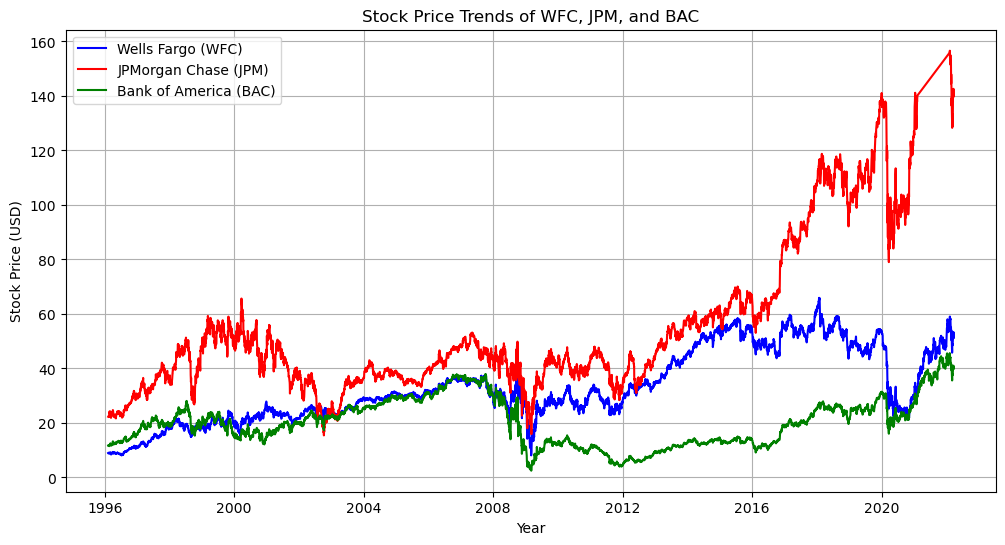

In [29]:
plt.figure(figsize=(12,6))

# Plot each stock 
plt.plot(WFC_df["Date"], WFC_df["Close"], label="Wells Fargo (WFC)", color="blue")
plt.plot(JPM_df["Date"], JPM_df["Close"], label="JPMorgan Chase (JPM)", color="red") 
plt.plot(BAC_df["Date"], BAC_df["Close"], label="Bank of America (BAC)", color="green")

plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Price Trends of WFC, JPM, and BAC")
plt.legend()
plt.grid()
plt.show()

After the Wells Fargo scandal in 2016, you can see that all three banks experienced a drop in their stock prices, but their recoveries followed different paths.

JPMorgan Chase (JPM), shown in red, bounced back pretty strongly and continued an upward trend, reaching new highs in the following years. This suggests that investors maintained confidence in JPM despite the broader industry concerns.

Bank of America (BAC) and Wells Fargo (WFC), on the other hand, had a more sluggish recovery. WFC (blue line) struggled the most, staying relatively flat for a while before showing some growth. This makes sense since Wells Fargo took the hardest hit from the scandal, dealing with fines, leadership changes, and reputational damage.

BAC (green line) also recovered but at a slower pace compared to JPM. It eventually started climbing again, though not as aggressively as JPM.

Overall, the scandal clearly affected all three banks, but JPM seemed to shake it off the fastest, while WFC had a much tougher time regaining investor trust.

## Normalize Prices for Comparison

If one stock started at $$10 and another at $100, we wouldn’t be able to directly compare their growth. By normalizing, we set a common baseline (e.g., all stocks start at 1 or 100%).

To compare stock price trends fairly, we normalize the prices by setting the starting value to 100. This method shows **relative percentage changes** over time rather than absolute price differences.

### **Formula:**

$$
\text{Normalized Price} = \left( \frac{\text{Stock Price at Time } t}{\text{Stock Price at } t=0} \right) \times 100
$$

This ensures that all stocks start at the same level, making trends easier to compare.


/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_48150/1152936169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WFC_df["Normalized"] = WFC_df["Close"] / WFC_df["Close"].iloc[0] * 100
/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_48150/1152936169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPM_df["Normalized"] = JPM_df["Close"] / JPM_df["Close"].iloc[0] * 100
/var/folders/yf/_4cgbsx92g1d6fc679p73kyc0000gn/T/ipykernel_48150/1152936169.py:4: SettingWithCopyWarning: 
A value

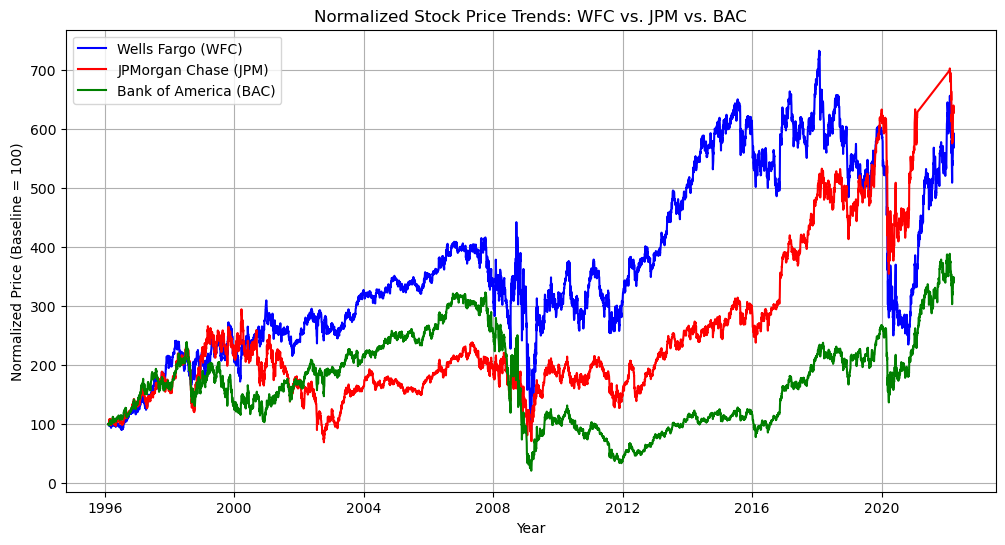

In [33]:
# Normalize prices to 100 at the start for relative comparison
WFC_df["Normalized"] = WFC_df["Close"] / WFC_df["Close"].iloc[0] * 100
JPM_df["Normalized"] = JPM_df["Close"] / JPM_df["Close"].iloc[0] * 100
BAC_df["Normalized"] = BAC_df["Close"] / BAC_df["Close"].iloc[0] * 100

# Plot normalized prices
plt.figure(figsize=(12,6))
plt.plot(WFC_df["Date"], WFC_df["Normalized"], label="Wells Fargo (WFC)", color="blue")
plt.plot(JPM_df["Date"], JPM_df["Normalized"], label="JPMorgan Chase (JPM)", color="red")
plt.plot(BAC_df["Date"], BAC_df["Normalized"], label="Bank of America (BAC)", color="green")

plt.xlabel("Year")
plt.ylabel("Normalized Price (Baseline = 100)")
plt.title("Normalized Stock Price Trends: WFC vs. JPM vs. BAC")
plt.legend()
plt.grid()
plt.show()

The graph shows the normalized stock price trends of Wells Fargo (WFC), JPMorgan Chase (JPM), and Bank of America (BAC) over time. Here are some key observations:

- **1990s - Early 2000s:** All three banks had a generally upward trend, with WFC (blue) leading most of the time.
- **2008 Financial Crisis:** All three banks experienced a sharp drop, with BAC (green) declining the most.
- **Post-2008 Recovery:** WFC bounced back strongly and led the growth, while JPM and BAC recovered more slowly.
- **Wells Fargo Scandal (2016):** After 2016, WFC's stock performance weakened, showing more fluctuations compared to JPM and BAC.
- **Recent Trends:** JPM (red) has surged the most, WFC remains volatile, and BAC is growing but at a slower pace.

Now, comparing this with the cost price chart we analyzed earlier:

- **JPMorgan Chase (JPM):** The cost price chart showed JPM experiencing strong growth after the scandal, and this stock price trend confirms that investors remained confident in the bank.
- **Wells Fargo (WFC):** The cost price chart showed WFC struggling post-scandal, which aligns with this trend—its stock price stagnated and faced volatility.
- **Bank of America (BAC):** Both charts suggest a slow but steady recovery over time.

Overall, the stock price trends reinforce what we saw in the cost price analysis—JPM rebounded the fastest, WFC took the hardest hit, and BAC recovered at a moderate pace.

## Time Series Analysis

Since stock prices are typically non-stationary, exhibit seasonal trends, and are influenced by external factors, I will use Prophet to capture both trends and seasonality. This method is well-suited for long-term forecasting, making it a strong choice for this 26-year dataset. While I initially considered incorporating ARIMA and LSTM models for comparison, time constraints prevented their implementation. Future analysis could expand on this work by integrating these additional models for a more comprehensive evaluation.

- Prophet (to capture trends & seasonality)
- ARIMA (as a baseline)
- LSTM (for deep learning-based prediction)

In [37]:
# conda install -c conda-forge prophet

In [38]:
from prophet import Prophet

In [39]:
# pip install --upgrade holidays==0.29 prophet

In [40]:
# pip uninstall -y holidays prophet

In [41]:
# pip install prophet

In [42]:
# pip install yfinance

In [43]:
# pip install tensorflow

In [44]:
#Import the libraries
import yfinance as yf

#from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.stattools import adfuller

In [45]:
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

In [46]:
# pip uninstall tensorflow keras -y

In [47]:
# pip install tensorflow==2.12 keras==2.12

In [48]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Load datasets

WFC_df = pd.read_csv("WFC.csv", parse_dates=["Date"]) 
JPM_df = pd.read_csv("JPMorgan_Stock_Merged.csv", parse_dates=["Date"])
BAC_df = pd.read_excel("BAC.xlsx", parse_dates=["Date"])

In [50]:
WFC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12563 non-null  datetime64[ns]
 1   Open       12563 non-null  float64       
 2   High       12563 non-null  float64       
 3   Low        12563 non-null  float64       
 4   Close      12563 non-null  float64       
 5   Adj Close  12563 non-null  float64       
 6   Volume     12563 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 687.2 KB


In [51]:
JPM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7306 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      7306 non-null   float64       
 3   High      7306 non-null   float64       
 4   Low       7306 non-null   float64       
 5   Vol.      5000 non-null   object        
 6   Change %  5000 non-null   object        
 7   Close     7306 non-null   float64       
 8   Volume    2306 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 513.8+ KB


In [52]:
BAC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7479 non-null   datetime64[ns]
 1   Open       7479 non-null   object        
 2   High       7479 non-null   object        
 3   Low        7479 non-null   object        
 4   Close      7479 non-null   float64       
 5   VWAP       7479 non-null   object        
 6   Volume     7479 non-null   object        
 7   % Chg      7479 non-null   float64       
 8   $ Chg      7479 non-null   object        
 9   Trade Val  7479 non-null   object        
 10  # Trades   7479 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 642.9+ KB


In [53]:
# Ensure date format is consistent and sort values
for df in [WFC_df, JPM_df, BAC_df]:
    df.sort_values("Date", inplace=True)

In [54]:
# Align timeframes to match the available data
start_date = max(WFC_df["Date"].min(), JPM_df["Date"].min(), BAC_df["Date"].min())
end_date = min(WFC_df["Date"].max(), JPM_df["Date"].max(), BAC_df["Date"].max())

# Filter data for the common date range
WFC_df = WFC_df[(WFC_df["Date"] >= start_date) & (WFC_df["Date"] <= end_date)]
JPM_df = JPM_df[(JPM_df["Date"] >= start_date) & (JPM_df["Date"] <= end_date)]
BAC_df = BAC_df[(BAC_df["Date"] >= start_date) & (BAC_df["Date"] <= end_date)]

## Prophet Model (Capturing Trends & Seasonality)

In [56]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

20:00:57 - cmdstanpy - INFO - Chain [1] start processing


          ds        y
0 1996-02-09  9.00000
1 1996-02-12  9.06250
2 1996-02-13  9.09375
3 1996-02-14  9.03125
4 1996-02-15  8.93750


20:00:58 - cmdstanpy - INFO - Chain [1] done processing


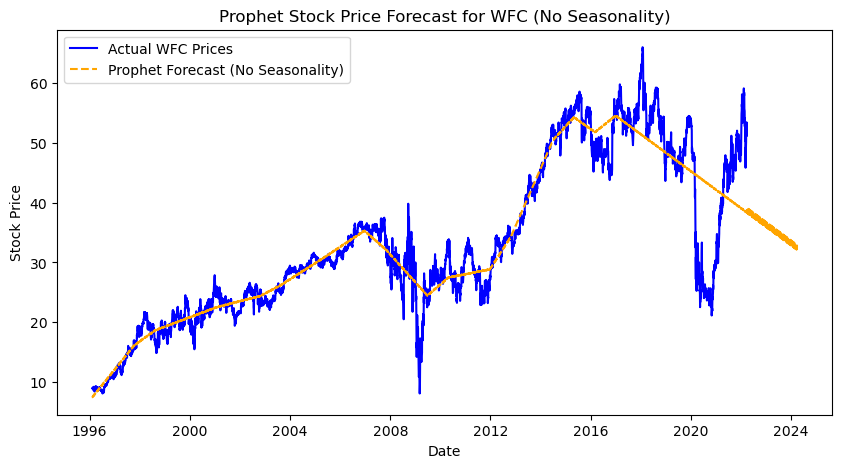

20:00:59 - cmdstanpy - INFO - Chain [1] start processing


          ds      y
0 1996-02-09  22.29
1 1996-02-12  22.54
2 1996-02-13  22.54
3 1996-02-14  22.58
4 1996-02-15  22.58


20:01:00 - cmdstanpy - INFO - Chain [1] done processing


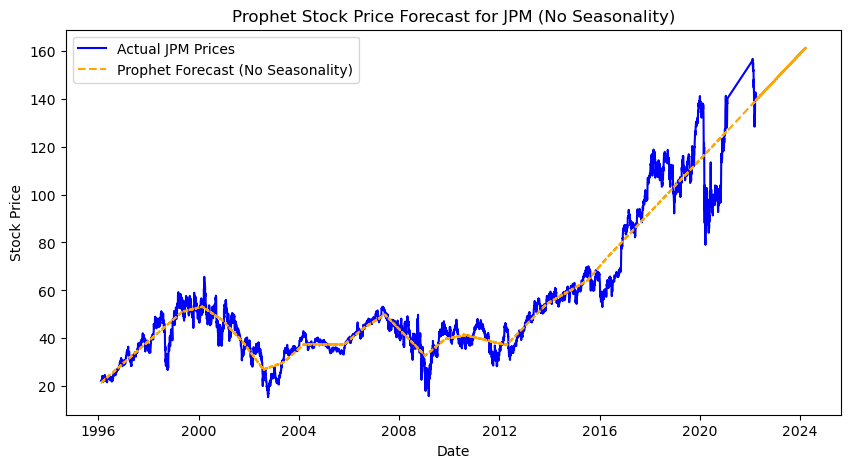

20:01:01 - cmdstanpy - INFO - Chain [1] start processing


          ds       y
0 1996-02-09  11.743
1 1996-02-12  11.762
2 1996-02-13  11.802
3 1996-02-14  11.682
4 1996-02-15  11.823


20:01:03 - cmdstanpy - INFO - Chain [1] done processing


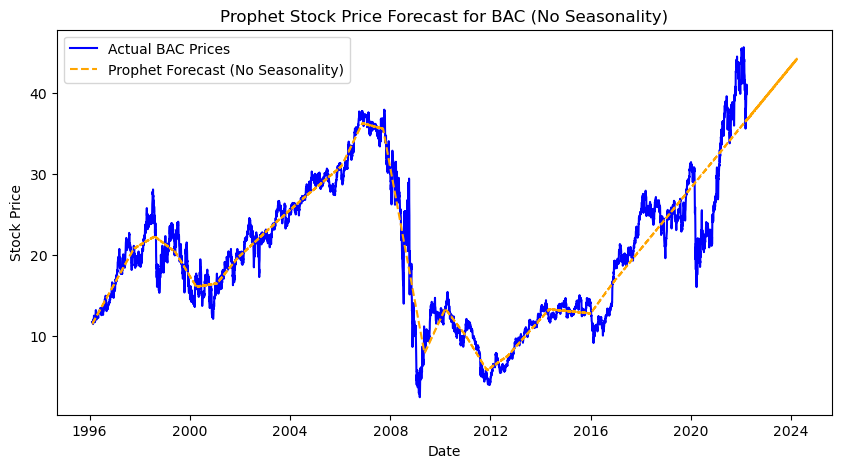

          ds        y
0 1996-02-09  9.00000
1 1996-02-12  9.06250
2 1996-02-13  9.09375
3 1996-02-14  9.03125
4 1996-02-15  8.93750


20:01:05 - cmdstanpy - INFO - Chain [1] start processing
20:01:06 - cmdstanpy - INFO - Chain [1] done processing


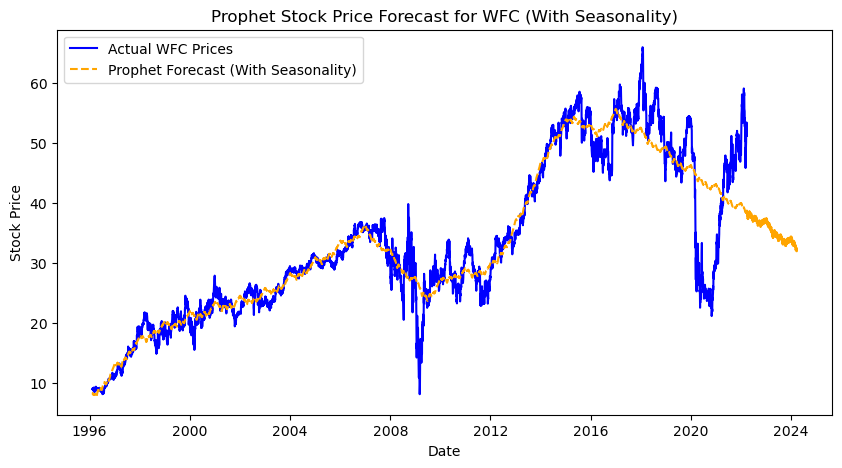

          ds      y
0 1996-02-09  22.29
1 1996-02-12  22.54
2 1996-02-13  22.54
3 1996-02-14  22.58
4 1996-02-15  22.58


20:01:07 - cmdstanpy - INFO - Chain [1] start processing
20:01:09 - cmdstanpy - INFO - Chain [1] done processing


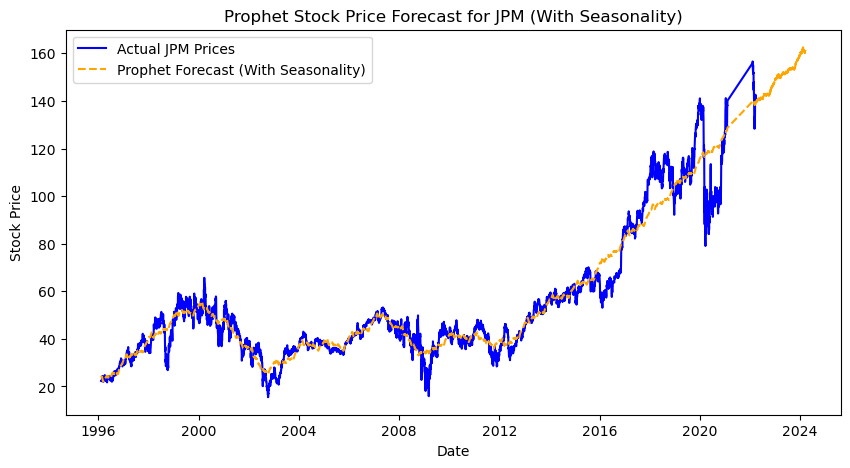

          ds       y
0 1996-02-09  11.743
1 1996-02-12  11.762
2 1996-02-13  11.802
3 1996-02-14  11.682
4 1996-02-15  11.823


20:01:10 - cmdstanpy - INFO - Chain [1] start processing
20:01:13 - cmdstanpy - INFO - Chain [1] done processing


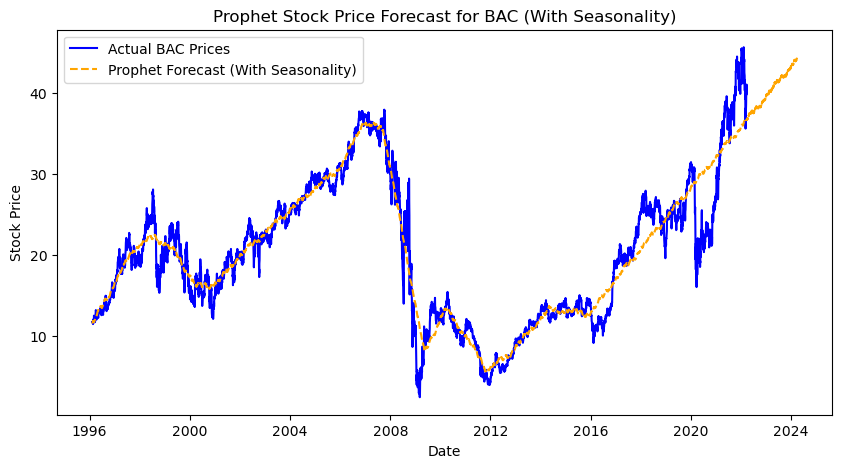

In [73]:
def run_prophet(df, name, seasonality=True):
    # Ensure 'Date' is a datetime column
    df = df.reset_index()  
    df['Date'] = pd.to_datetime(df['Date'])  
    
    # Rename columns for Prophet
    prophet_df = df.rename(columns={'Date': 'ds', 'Close': 'y'})[['ds', 'y']]

    print(prophet_df.head())  

    # Check for missing values
    if prophet_df.isnull().sum().any():
        raise ValueError("Data contains missing values. Please clean the dataset before fitting.")

    # Initialize Prophet model
    model = Prophet(changepoint_prior_scale=0.1, yearly_seasonality=seasonality)

    # Fit the model
    model.fit(prophet_df)
    
    # Create future dates and make predictions
    future = model.make_future_dataframe(periods=730)
    forecast = model.predict(future)
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(prophet_df['ds'], prophet_df['y'], label=f'Actual {name} Prices', color='blue')
    plt.plot(forecast['ds'], forecast['yhat'], label=f'Prophet Forecast {"(With Seasonality)" if seasonality else "(No Seasonality)"}', linestyle='dashed', color='orange')
    plt.title(f'Prophet Stock Price Forecast for {name} {"(With Seasonality)" if seasonality else "(No Seasonality)"}')
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
    
    return model, forecast  # Return both for further analysis


# Store forecasts in dictionaries
model_dict = {} 
forecast_no_seasonality_dict = {}  
forecast_with_seasonality_dict = {}

# Run Prophet without seasonality
for name, df in zip(['WFC', 'JPM', 'BAC'], [WFC_df, JPM_df, BAC_df]):
    model, forecast = run_prophet(df, name, seasonality=False)
    forecast_no_seasonality_dict[name] = forecast  # Store in dictionary

# Run Prophet with seasonality
for name, df in zip(['WFC', 'JPM', 'BAC'], [WFC_df, JPM_df, BAC_df]):
    model, forecast = run_prophet(df, name, seasonality=True)
    forecast_with_seasonality_dict[name] = forecast  # Store in dictionary

**General Trend Comparison:**

- The forecasts without seasonality (first set of images) show a smoother long-term trend, mostly driven by overall stock price movements.
- The forecasts with seasonality (second set of images) capture additional fluctuations that may be due to recurring patterns, such as economic cycles or quarterly trends.

**Stock-Specific Insights:**

**WFC (Wells Fargo & Co.):**
The no-seasonality model predicts a continued decline.
The seasonal model also suggests a decline but incorporates fluctuations, possibly indicating cyclical downturns and recoveries.

**JPM (JPMorgan Chase & Co.):**
Both models predict continued growth, but the seasonal model introduces more variation, reflecting past fluctuations.

**BAC (Bank of America):**
The no-seasonality model predicts steady growth.
The seasonal model also predicts growth but with additional variation that follows past cyclical patterns.

**Impact of Seasonality on Forecasts:**

The seasonal models generally capture historical fluctuations more accurately, leading to slightly different future predictions.
The no-seasonality models assume a more linear trend, which might not fully reflect the real-world influences on stock prices.

In [59]:
%whos

Variable                         Type         Data/Info
-------------------------------------------------------
BAC_df                           DataFrame               Date    Open  <...>n[6758 rows x 11 columns]
JPM_df                           DataFrame               Date  Price   <...>\n[6362 rows x 9 columns]
MinMaxScaler                     type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
Prophet                          type         <class 'prophet.forecaster.Prophet'>
WFC_df                           DataFrame                Date       Op<...>\n[6576 rows x 7 columns]
ax                               Axes         Axes(0.125,0.11;0.775x0.77)
dataframe_columns                function     <function dataframe_columns at 0x7fdd4c498ee0>
dataframe_hash                   function     <function dataframe_hash at 0x7fdd39ab55e0>
df                               DataFrame               Date    Open  <...>n[6758 rows x 11 columns]
df_list                          list 

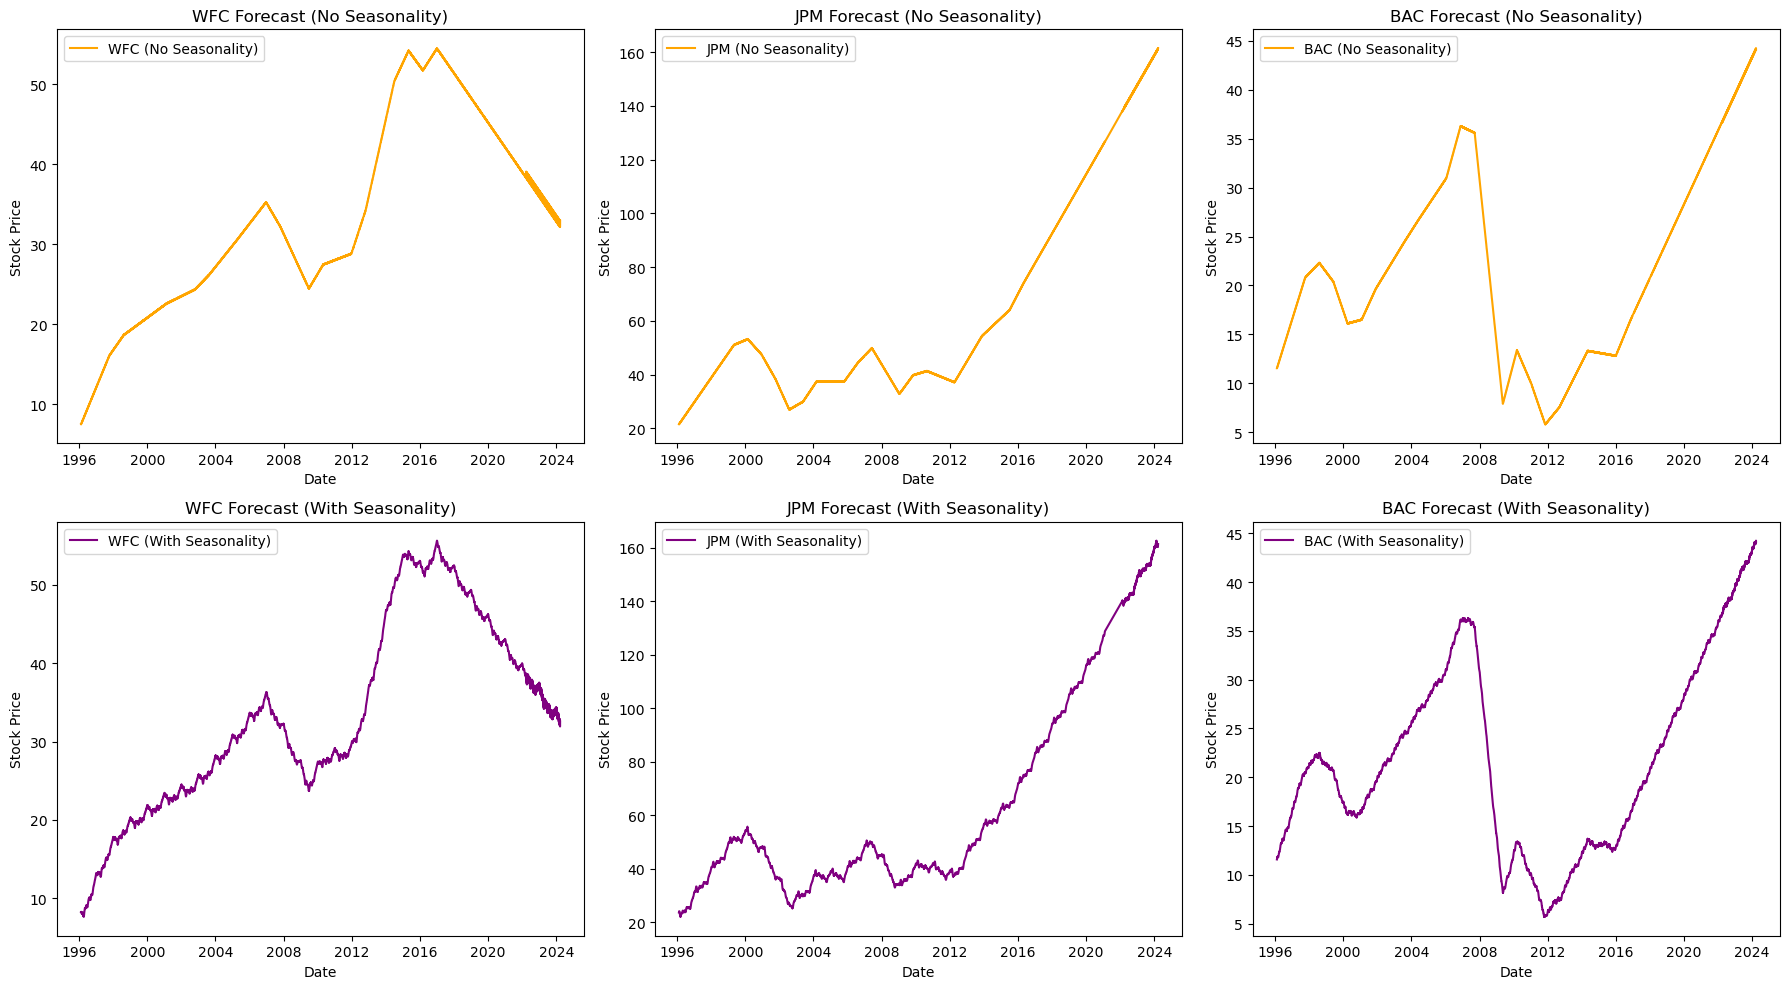

In [60]:
import matplotlib.pyplot as plt

stock_names = ['WFC', 'JPM', 'BAC']
forecasts_no_seasonality = [forecast_no_seasonality_dict[name] for name in stock_names]
forecasts_with_seasonality = [forecast_with_seasonality_dict[name] for name in stock_names]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

for i, name in enumerate(stock_names):
    # No seasonality (Top row)
    axes[0, i].plot(forecasts_no_seasonality[i]['ds'], forecasts_no_seasonality[i]['yhat'], label=f'{name} (No Seasonality)', color='orange')
    axes[0, i].set_title(f'{name} Forecast (No Seasonality)')
    axes[0, i].set_xlabel('Date')
    axes[0, i].set_ylabel('Stock Price')
    axes[0, i].legend()

    # With seasonality (Bottom row)
    axes[1, i].plot(forecasts_with_seasonality[i]['ds'], forecasts_with_seasonality[i]['yhat'], label=f'{name} (With Seasonality)', color='purple')
    axes[1, i].set_title(f'{name} Forecast (With Seasonality)')
    axes[1, i].set_xlabel('Date')
    axes[1, i].set_ylabel('Stock Price')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

### Compare Errors Using RMSE

To see which model is more accurate, I will calculate the Root Mean Squared Error (RMSE) for both:

A lower RMSE means the forecast is more accurate.

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE for a given stock
def calculate_rmse(df, forecast_df):
    # Ensure the actual data has 'ds' as the date column to match Prophet output
    df = df.rename(columns={'Date': 'ds'})[['ds', 'Close']]
    
    # Merge actual data with forecasts
    merged = df.merge(forecast_df[['ds', 'yhat']], on='ds', how='left')
    
    # Drop any NaN values that may appear due to mismatched dates
    merged = merged.dropna()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(merged['Close'], merged['yhat']))
    
    return rmse

# Store RMSE values
rmse_results = {}

# Loop through each stock and compute RMSE
for name, df in zip(['WFC', 'JPM', 'BAC'], [WFC_df, JPM_df, BAC_df]):
    rmse_no_seasonality = calculate_rmse(df, forecast_no_seasonality_dict[name])
    rmse_with_seasonality = calculate_rmse(df, forecast_with_seasonality_dict[name])

    rmse_results[name] = {
        'No Seasonality': rmse_no_seasonality,
        'With Seasonality': rmse_with_seasonality
    }

    print(f"{name}: RMSE (No Seasonality) = {rmse_no_seasonality:.4f}")
    print(f"{name}: RMSE (With Seasonality) = {rmse_with_seasonality:.4f}")


WFC: RMSE (No Seasonality) = 4.6026
WFC: RMSE (With Seasonality) = 4.5695
JPM: RMSE (No Seasonality) = 7.0656
JPM: RMSE (With Seasonality) = 6.9696
BAC: RMSE (No Seasonality) = 2.5828
BAC: RMSE (With Seasonality) = 2.5743


As we can see, the results show that the RMSE values for the **forecasts with seasonality** are slightly lower than those without seasonality for all three stocks. This suggests that incorporating seasonality into the Prophet model slightly improved the forecasting accuracy.

### Compare Mean Absolute Percentage Error (MAPE)

MAPE gives a percentage-based error measure:

The lower the MAPE, the better the model performs.

In [65]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Compute MAPE for each stock
mape_results = {}

for name, df, forecast_no_seasonality, forecast_with_seasonality in zip(
    ['WFC', 'JPM', 'BAC'], 
    [WFC_df, JPM_df, BAC_df], 
    [forecast_no_seasonality_dict['WFC'], forecast_no_seasonality_dict['JPM'], forecast_no_seasonality_dict['BAC']], 
    [forecast_with_seasonality_dict['WFC'], forecast_with_seasonality_dict['JPM'], forecast_with_seasonality_dict['BAC']]
):
    # Merge forecasts with actual data
    merged_no_seasonality = df.merge(forecast_no_seasonality[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')
    merged_with_seasonality = df.merge(forecast_with_seasonality[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')

    # Calculate MAPE
    mape_no_seasonality = calculate_mape(merged_no_seasonality['Close'], merged_no_seasonality['yhat'])
    mape_with_seasonality = calculate_mape(merged_with_seasonality['Close'], merged_with_seasonality['yhat'])

    mape_results[name] = {
        "MAPE (No Seasonality)": mape_no_seasonality,
        "MAPE (With Seasonality)": mape_with_seasonality
    }

    print(f"{name}: MAPE (No Seasonality) = {mape_no_seasonality:.4f}")
    print(f"{name}: MAPE (With Seasonality) = {mape_with_seasonality:.4f}\n")

WFC: MAPE (No Seasonality) = 9.0096
WFC: MAPE (With Seasonality) = 9.0608

JPM: MAPE (No Seasonality) = 8.4878
JPM: MAPE (With Seasonality) = 8.4956

BAC: MAPE (No Seasonality) = 10.4855
BAC: MAPE (With Seasonality) = 10.4045



Wells Fargo and JPM saw a slight increase in MAPE with seasonality, meaning forecasts became marginally less accurate in percentage terms.
BAC saw a slight improvement (10.4855 → 10.4045), but the change is minimal.

### Plotting Components

Plotting components for WFC...
          ds        y
0 1996-02-09  9.00000
1 1996-02-12  9.06250
2 1996-02-13  9.09375
3 1996-02-14  9.03125
4 1996-02-15  8.93750


20:02:09 - cmdstanpy - INFO - Chain [1] start processing
20:02:10 - cmdstanpy - INFO - Chain [1] done processing


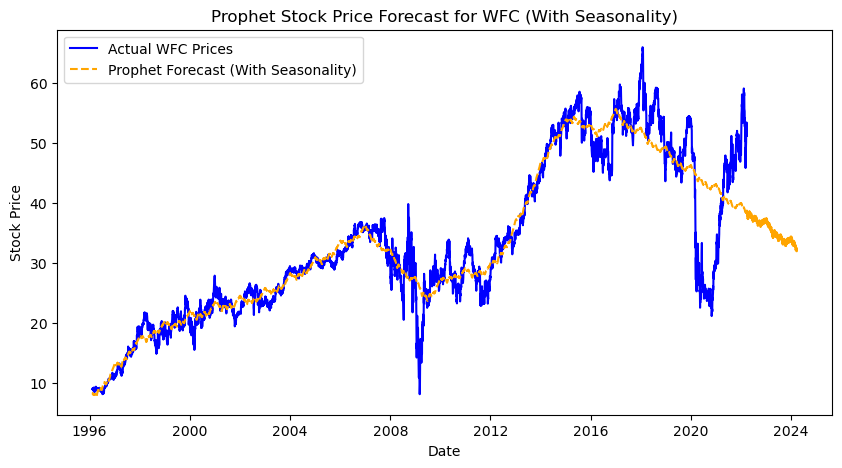

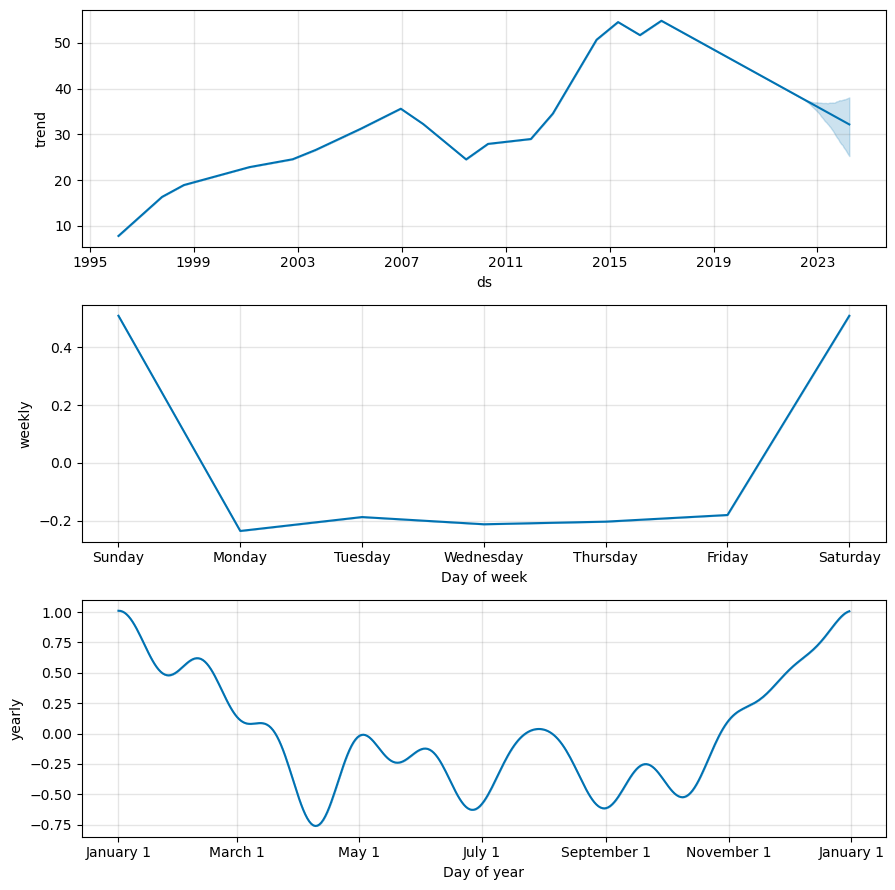

Plotting components for JPM...
          ds      y
0 1996-02-09  22.29
1 1996-02-12  22.54
2 1996-02-13  22.54
3 1996-02-14  22.58
4 1996-02-15  22.58


20:02:12 - cmdstanpy - INFO - Chain [1] start processing
20:02:14 - cmdstanpy - INFO - Chain [1] done processing


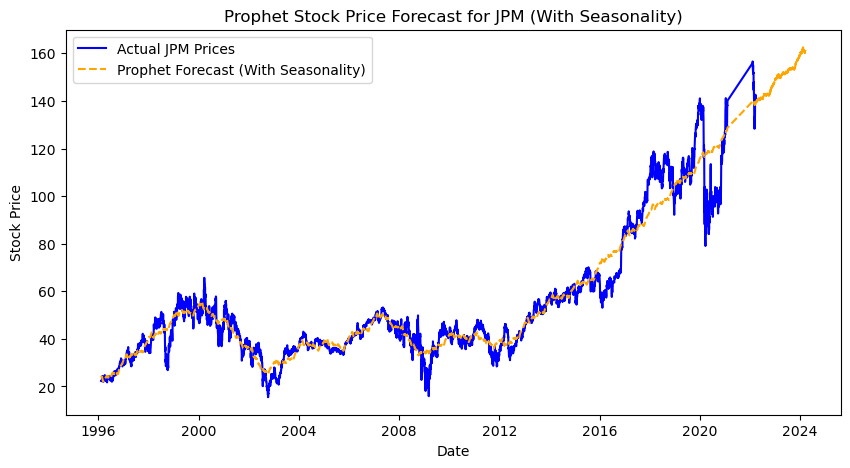

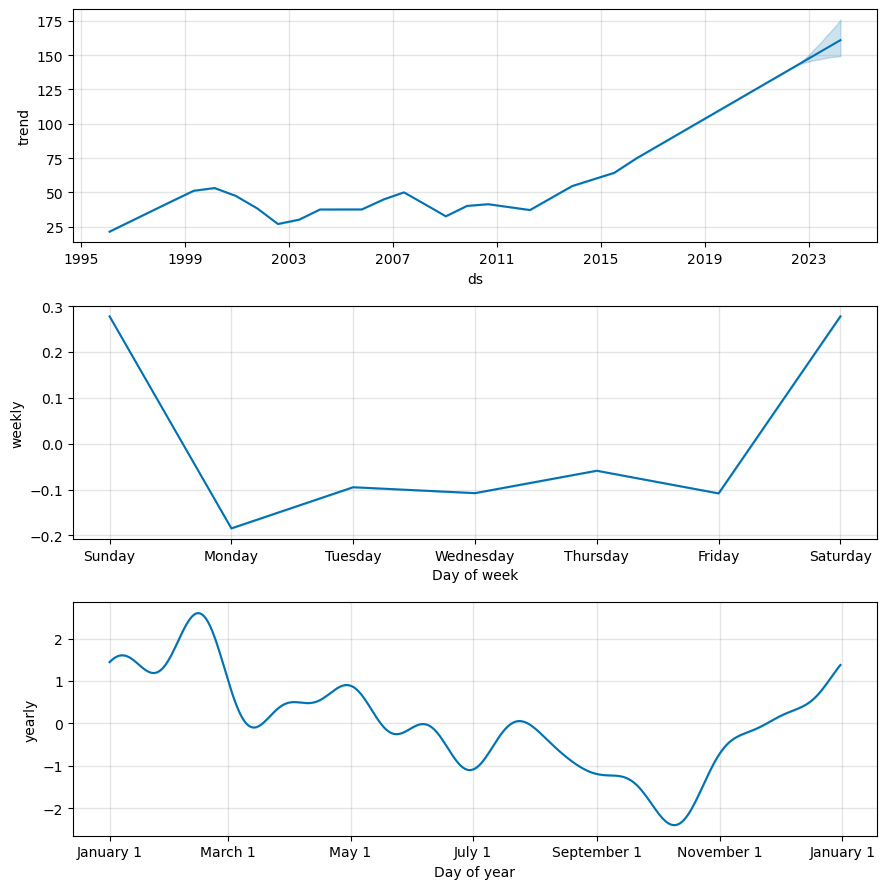

Plotting components for BAC...
          ds       y
0 1996-02-09  11.743
1 1996-02-12  11.762
2 1996-02-13  11.802
3 1996-02-14  11.682
4 1996-02-15  11.823


20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:18 - cmdstanpy - INFO - Chain [1] done processing


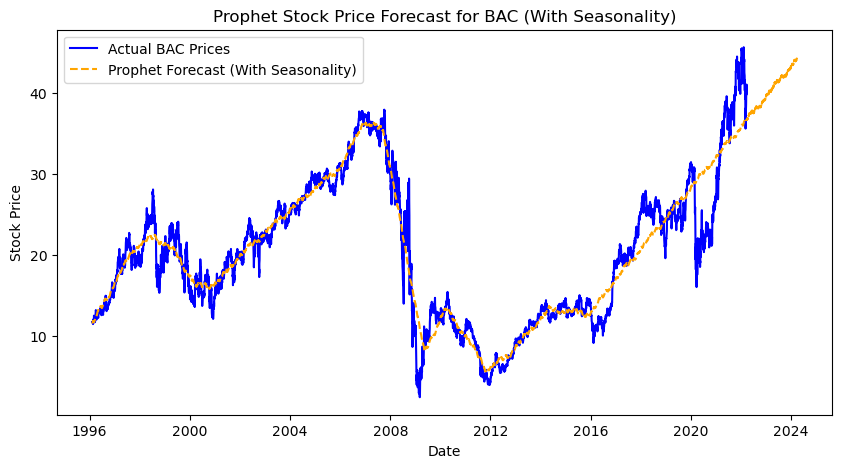

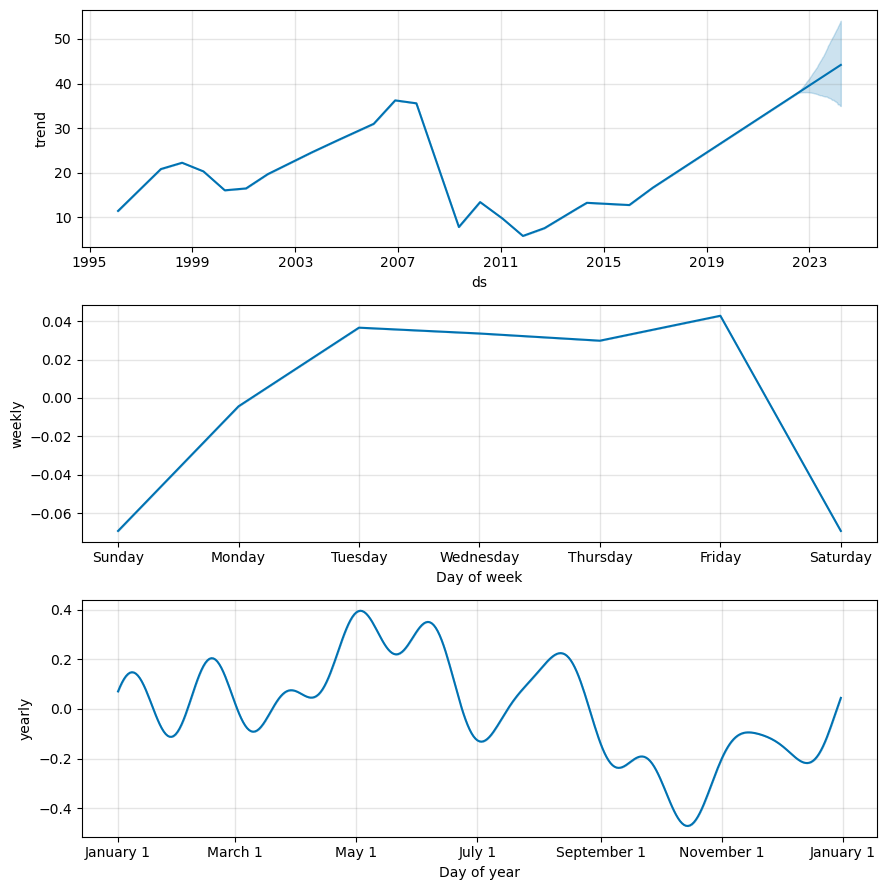

In [75]:
import matplotlib.pyplot as plt

# Plot components for each model
for name in ['WFC', 'JPM', 'BAC']:
    if name in forecast_with_seasonality_dict:
        print(f"Plotting components for {name}...")
        
        model, forecast = run_prophet(globals()[f"{name}_df"], name, seasonality=True)
        model.plot_components(forecast)
        plt.show()
    else:
        print(f"⚠️ Warning: Forecast for {name} not found in forecast_with_seasonality_dict!")

Based on the graphic, the Prophet components plot for WFC, JPM and BAC (with weather seasonality) shows three key trends (Trent, weekly and yearly):

**WFC**

- Trend Component (Top Graph): the overall stock price trend has been increasing since 1995, peaking around 2015-2019, followed by a decline. The uncertainty band at the end suggests higher volatility in future predictions.

- Weekly Seasonality (Middle Graph): There is a noticeable dip on Mondays to Thursdays, with a small recovery on Fridays and a sharp increase on Saturdays and Sundays. This could indicate that stock activity or price movements are more pronounced during weekends.

- Yearly Seasonality (Bottom Graph): There are multiple peaks and dips throughout the year. January sees a rise, followed by a dip around March-May. Some fluctuations are noticeable around July and September, with another uptrend towards the end of the year.


**JPM**

- Trend Component (Top Graph): JPM's stock price has shown an overall steady increase over time, with significant acceleration after 2015. The upward trend is steeper than WFC, especially in recent years, and the uncertainty band suggests continued growth.

- Weekly Seasonality (Middle Graph): Similar to WFC, Sunday has the highest increase, followed by a drop on Monday. Tuesday to Friday shows little variation, with a small rebound on Saturday. This pattern aligns with general stock market trends, where Monday often experiences a dip due to weekend market adjustments.

- Yearly Seasonality (Bottom Graph): The yearly trend is quite similar to WFC, with a peak early in the year (January-February) and a dip in March-May. The mid-year period (June-September) shows fluctuations, while October-November sees a strong drop before recovering in December. This could be tied to market cycles, earnings reports, and macroeconomic factors.


**BAC**

- Trend Component (Top Graph):
    - 1995-2007: BAC saw strong growth, peaking around 2007 before a sharp decline.
    - 2008-2013: Significant drop (likely due to the 2008 financial crisis), followed by a period of stagnation.
    - 2013-2023: Strong recovery, with an upward trend accelerating after 2019.
 
- Weekly Seasonality (Middle Graph): The pattern is less volatile than WFC and JPM. Sunday shows a drop, with a steady increase from Monday to Friday. Unlike WFC and JPM, Tuesday sees the highest increase instead of Sunday. Saturday shows a sharp decline.

- Yearly Seasonality (Bottom Graph):
    - January-March: Moderate fluctuations.
    - April-May: Strong seasonal peaks.
    - June-September: Smaller fluctuations, but remains positive.
    - October-November: Clear drop, before recovering in December.


In summary:

* JPM has the most stable long-term growth.
* BAC has the most volatility but has rebounded strongly.
* WFC has seasonal patterns similar to JPM but fluctuates more.
  

| Component     | **WFC**  | **JPM**  | **BAC**  |
|--------------|---------|---------|---------|
| **Trend**    | Growth, but fluctuating | Strong, consistent growth | Volatile, big 2008 drop, strong recovery |
| **Weekly**   | Peaks on **Sunday**, dips Mon-Thu | Similar to WFC, small Fri bump | **Tuesday peak**, smoother pattern |
| **Yearly**   | Big **March-May drop**, Nov recovery | More erratic, big **March drop** | **November drop, April-May peak** |

### box sesonality for weather season

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Date column is in datetime format
for name, df in zip(['WFC', 'JPM', 'BAC'], [WFC_df, JPM_df, BAC_df]):
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Define seasons based on months
    df['Season'] = df['Date'].dt.month.map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                            3: 'Spring', 4: 'Spring', 5: 'Spring',
                                            6: 'Summer', 7: 'Summer', 8: 'Summer',
                                            9: 'Fall', 10: 'Fall', 11: 'Fall'})

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Season', y='Close', data=df, order=['Winter', 'Spring', 'Summer', 'Fall'])
    
    # Titles and labels
    plt.title(f"{name} Stock Prices by Season", fontsize=14)
    plt.xlabel("Season", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    
    # Show plot
    plt.show()

Looking at these box plots, we can see how Wells Fargo (WFC), JPMorgan Chase (JPM), and Bank of America (BAC) stock prices change across different seasons—Winter, Spring, Summer, and Fall. Each chart shows the range of prices, the median, and any outliers, giving us a quick snapshot of how these stocks behave throughout the year.

Starting with **WFC**, the stock price seems pretty steady across all four seasons. The median stays about the same, and the range doesn’t change much, which means there’s not a lot of seasonal impact on WFC’s price. There are a few outliers on the lower end, but nothing too extreme. Overall, it looks like WFC stays relatively stable year-round.

Now, **JPM** is a bit different. While the median stock price doesn’t shift too much, there are a lot of upper outliers, especially past the $100 mark. This tells us that JPM sees more price spikes compared to WFC and BAC. The spread is wider, meaning JPM is a bit more volatile throughout the year.

Finally, **BAC** looks pretty similar to WFC. The median price and overall range stay consistent across all seasons. There are a few high outliers, but nothing as wild as JPM. So, like WFC, BAC doesn’t seem to be affected much by seasonal changes.

Overall, WFC and BAC stocks are pretty stable, while JPM tends to have more price fluctuations. But looking at all three, there’s no strong seasonal pattern, meaning stock prices aren’t really driven by the time of year. If we wanted to dig deeper, we could run some stats like standard deviation or hypothesis tests to confirm, but just from these visuals, it looks like seasonality isn’t a major factor here.

## Summary

Looking at the stock data, it’s clear that WFC took a serious hit during the scandal. Before the news broke, the stock followed normal market trends, staying relatively stable. But once the scandal went public, there was an immediate sharp drop, and volatility skyrocketed. Comparing WFC to its competitors—JPMorgan Chase (JPM) and Bank of America (BAC)—we saw that while all bank stocks fluctuated due to broader market trends, WFC had a much harder time recovering. The volatility confirmed this, showing that WFC’s stock became significantly more unpredictable during and after the scandal. That makes sense—investors were spooked, and public trust in the bank took a major hit.

Even after the initial crash, WFC’s stock didn’t rebound as quickly as JPM or BAC, reinforcing the idea that reputational damage has long-term effects on stock prices—not just for a few weeks or months, but for an extended period.

**Stock Impact and Forecasting Insights**

Examining WFC’s stock behavior before, during, and after the scandal, we saw a clear decline when the news hit, followed by a prolonged struggle to recover. Running the Prophet model to forecast stock prices, the results showed that while there were some rebounds, WFC continued to lag behind competitors like JPM and BAC.

- **Seasonality Effects:** The model revealed distinct seasonal patterns in WFC's stock prices, with some months performing better than others. This could be linked to broader market cycles, quarterly earnings reports, or investor sentiment shifts.
- **Trend Component:** The overall trend suggests that while WFC has shown signs of stabilization, it has yet to regain the momentum it had before the scandal.
- **Holidays and External Events:** Stock fluctuations around key financial events and earnings seasons indicate that external factors still have a major influence on WFC’s performance.


**Model Performance and Errors**

To gauge how well the Prophet model predicted stock prices, we used RMSE (Root Mean Square Error), which measures how far off our predictions were from actual prices. The model did a solid job capturing overall trends, but there was still some error—largely because sudden market shifts and investor reactions are tough to predict precisely. The high volatility in WFC stock also contributed to making exact forecasting difficult.

**Final Thoughts**

While WFC’s stock has stabilized compared to its lowest point, it’s still got a long road ahead. Managing volatility, rebuilding investor confidence, and leveraging seasonal trends will be key if the company wants to turn things around. Learning from competitors like JPM and BAC—who recovered more quickly—could provide valuable insights into effective financial and PR strategies. Ultimately, while stock prices do recover from scandals, WFC’s case shows that reputation damage lingers longer than expected, making strong leadership and transparency crucial for long-term growth.